C:\Users\salma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5523 - loss: 0.6216 - val_accuracy: 1.0000 - val_loss: 0.3638
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.2269 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 5.8244e-04 - val_accuracy: 1.0000 - val_loss: 6.2819e-05
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 4.9476e-05 - val_accuracy: 1.0000 - val_loss: 3.6972e-05
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 3.5331e-05 - val_accuracy: 1.0000 - val_loss: 3.1386e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


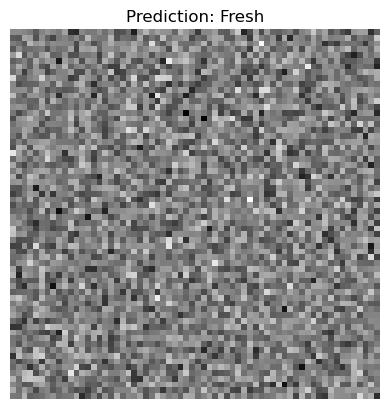

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

num_samples = 1000
img_height, img_width = 64, 64

# Class 0: "Fresh" (low contrast)
class_0 = np.random.normal(loc=0.3, scale=0.1, size=(num_samples//2, img_height, img_width, 1))

# Class 1: "Spoiled" (high contrast)
class_1 = np.random.normal(loc=0.7, scale=0.2, size=(num_samples//2, img_height, img_width, 1))

# Combine and shuffle
X = np.vstack((class_0, class_1)).astype(np.float32)
y = np.array([0]*(num_samples//2) + [1]*(num_samples//2))

shuffle_idx = np.random.permutation(num_samples)
X, y = X[shuffle_idx], y[shuffle_idx]

# 2. Define the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(X, y, epochs=5, batch_size=32, validation_split=0.2)

# 5. Test on a sample image
sample = X[0]
prediction = model.predict(sample[np.newaxis])[0][0]
label = "Spoiled" if prediction > 0.5 else "Fresh"

# 6. Display the test image and prediction
plt.imshow(sample.squeeze(), cmap='gray')
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()
